In [81]:
import pandas as pd
import numpy as np
import os
import sys
import sklearn
from sktime.utils.load_data import load_from_tsfile_to_dataframe
from sktime.utils.data_container import from_nested_to_long
from sktime.utils.data_container import tabularize
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.neighbors import KNeighborsClassifier

# with sktime, we can write this as a pipeline
from sktime.transformers.series_as_features.reduce import Tabularizer
from sklearn.pipeline import make_pipeline

import sktime as skt
import matplotlib.pyplot as plt
import seaborn as sns
from utils import dataset_selector
pd.set_option('max_colwidth', 4000)
plt.rcParams["figure.figsize"] = (20,3)

display(dataset_selector)

Dropdown(description='Dataset:', index=6, options=('ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY…

In [104]:
data_folder = 'data/Univariate_ts'
dataset_name = dataset_selector.value
train_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TRAIN.ts")
test_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TEST.ts")
X_train, y_train  = load_from_tsfile_to_dataframe(train_dataset_path, replace_missing_vals_with='Nan')
X_test, y_test = load_from_tsfile_to_dataframe(test_dataset_path, replace_missing_vals_with='NaN')

In [105]:
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['1' '2' '3'] [114  91 262]


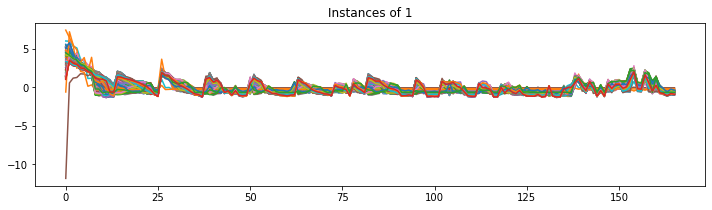

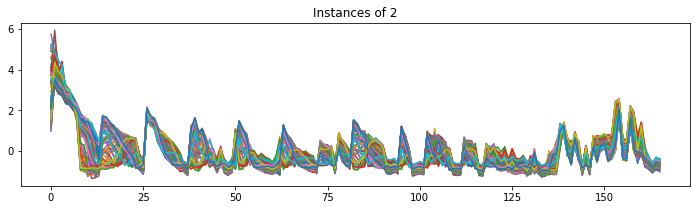

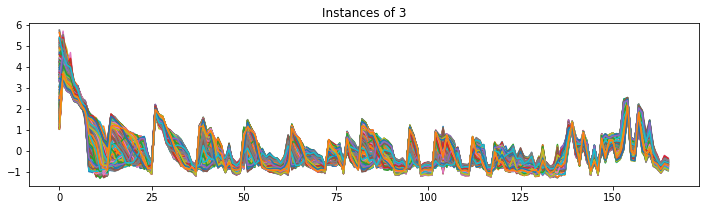

In [106]:
for label in labels:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
    for instance in X_train.loc[y_train == label, "dim_0"]:
        ax.plot(instance)
    ax.set(title=f"Instances of {label}")

In [107]:
for metric in ['dtw','ddtw','wdtw','wddtw','lcss','erp','msm'][:1]:
    knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric=metric)
    knn.fit(X_train, y_train)
    print(metric,knn.score(X_test, y_test))

dtw 0.65


KeyboardInterrupt: 

In [103]:
for metric in sorted(sklearn.neighbors.VALID_METRICS['brute']):
    knn = make_pipeline(
        Tabularizer(),
        KNeighborsClassifier(n_neighbors=1, metric=metric))
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))

0.6010230179028133
0.48081841432225064
0.6163682864450127
0.59846547314578
0.6112531969309463
0.6112531969309463
0.6112531969309463
0.017902813299232736
0.6112531969309463
0.020460358056265986


ValueError: Haversine distance only valid in 2 dimensions

In [82]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']